## Import statements

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import *
import seaborn as sns

import keras
import keras.backend as K
from keras.layers import *
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import *
from utils import train_test_split
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.layers import Lambda
from keras.backend import slice
import tensorflow as tf


%matplotlib inline

## Load the preprocessed data

In [48]:
data = np.load('preprocessed-data.npz')
X, y = data['X'], data['y']

In [3]:
X.shape

(1070, 50, 200, 1)

In [4]:
y.shape

(1070, 5, 36)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=13)

In [6]:
X_train.shape, X_test.shape

((909, 50, 200, 1), (161, 50, 200, 1))

In [7]:
y_train.shape, y_test.shape

((909, 5, 36), (161, 5, 36))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=13)

In [9]:
X_train.shape, X_test.shape

((909, 50, 200, 1), (161, 50, 200, 1))

In [11]:
y_train.shape, y_test.shape

((909, 5, 36), (161, 5, 36))

## Build the model

In [12]:
t_in = Input(shape=(50, 200, 1))
x = t_in

x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2))(x)
x = Dropout(0.4)(x)

t_lstm_in = x
t_out = []

for k in range(0, 5):
    x = Lambda(lambda x: x[:, :, k*5:(k+1)*5,:])(t_lstm_in)
    x = Reshape((1, -1))(x)
    x = LSTM(64, activation='relu')(x)
    x = Dense(48, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(36, activation='softmax', name='char_{}'.format(k))(x)
    t_out.append(x)


In [13]:
model = Model(inputs=t_in, outputs=t_out)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 200, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 200, 32)  320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 25, 100, 32)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 25, 100, 32)  0           max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

## Train the model

In [72]:
history = model.fit(X_train, [y_train[:, k, :] for k in range(0, 5)], batch_size=2, epochs=10, verbose=True)

Epoch 1/10
909/909 [==============================] - 53s 59ms/step - loss: 7.4757 - char_0_loss: 0.6091 - char_1_loss: 0.4401 - char_2_loss: 0.8176 - char_3_loss: 2.7030 - char_4_loss: 2.9059 - char_0_acc: 0.8075 - char_1_acc: 0.8482 - char_2_acc: 0.7668 - char_3_acc: 0.1639 - char_4_acc: 0.1155
Epoch 2/10
909/909 [==============================] - 53s 58ms/step - loss: 7.4665 - char_0_loss: 0.5273 - char_1_loss: 0.4876 - char_2_loss: 0.8757 - char_3_loss: 2.6710 - char_4_loss: 2.9049 - char_0_acc: 0.8372 - char_1_acc: 0.8559 - char_2_acc: 0.7404 - char_3_acc: 0.1628 - char_4_acc: 0.1155
Epoch 3/10
909/909 [==============================] - 53s 58ms/step - loss: 7.4623 - char_0_loss: 0.5354 - char_1_loss: 0.5241 - char_2_loss: 0.8201 - char_3_loss: 2.6772 - char_4_loss: 2.9055 - char_0_acc: 0.8262 - char_1_acc: 0.8559 - char_2_acc: 0.7371 - char_3_acc: 0.1804 - char_4_acc: 0.1155
Epoch 4/10
909/909 [==============================] - 52s 57ms/step - loss: 7.4312 - char_0_loss: 0.5485 -

Text(0, 0.5, 'Loss')

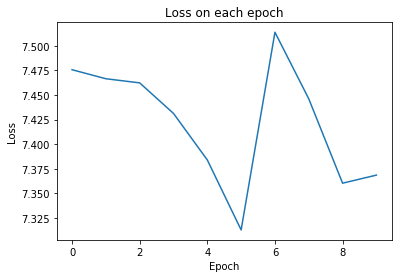

In [88]:
plt.plot(history.history['loss'])
plt.title('Loss on each epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Evaluate the model

In [75]:
y_test_pred = model.predict(X_test)

In [76]:
np.argmax(y_test_pred[0], axis=1)

array([28, 30, 30, 13,  3, 31,  1,  3, 34, 32,  3, 29,  3, 28, 33, 32,  1,
        2,  3, 23, 31,  2, 31,  1, 15,  6,  6, 23, 30, 13, 22, 30, 24, 34,
       13, 22, 28,  3, 32,  4,  5,  1, 13, 34, 13, 23, 15,  4, 31, 29,  6,
       23, 24, 24,  1,  3,  5,  4, 31, 32,  6,  6, 33, 31, 12,  1, 33, 13,
       13, 13,  3,  6, 15, 12, 29, 34, 29, 29, 24, 31, 13,  4,  2, 30, 34,
        4, 29, 22, 28, 28, 22,  5, 30,  4, 13, 32, 24, 30,  3, 31, 33, 22,
        2,  5, 34, 28, 24,  6, 13,  6, 13, 31, 13, 15, 33, 13, 23, 23, 33,
       15, 13, 33, 12, 33, 28, 34, 30, 23,  3, 30, 24,  6, 31, 12, 28, 23,
       32, 23,  4,  6, 15, 23, 28, 13,  5,  3, 31, 15,  2, 15,  4,  3, 32,
       22,  3, 32, 15, 29, 23, 31, 29])

In [86]:
scores = [np.mean(np.argmax(y_test_pred[k], axis=1) == np.argmax(y_test[:, k, :], axis=1)) for k in range(0, 5)]
print('Accuracy scores for each character: {}'.format([round(score, 3) for score in scores]))

Accuracy scores for each character: [0.957, 0.919, 0.839, 0.155, 0.106]


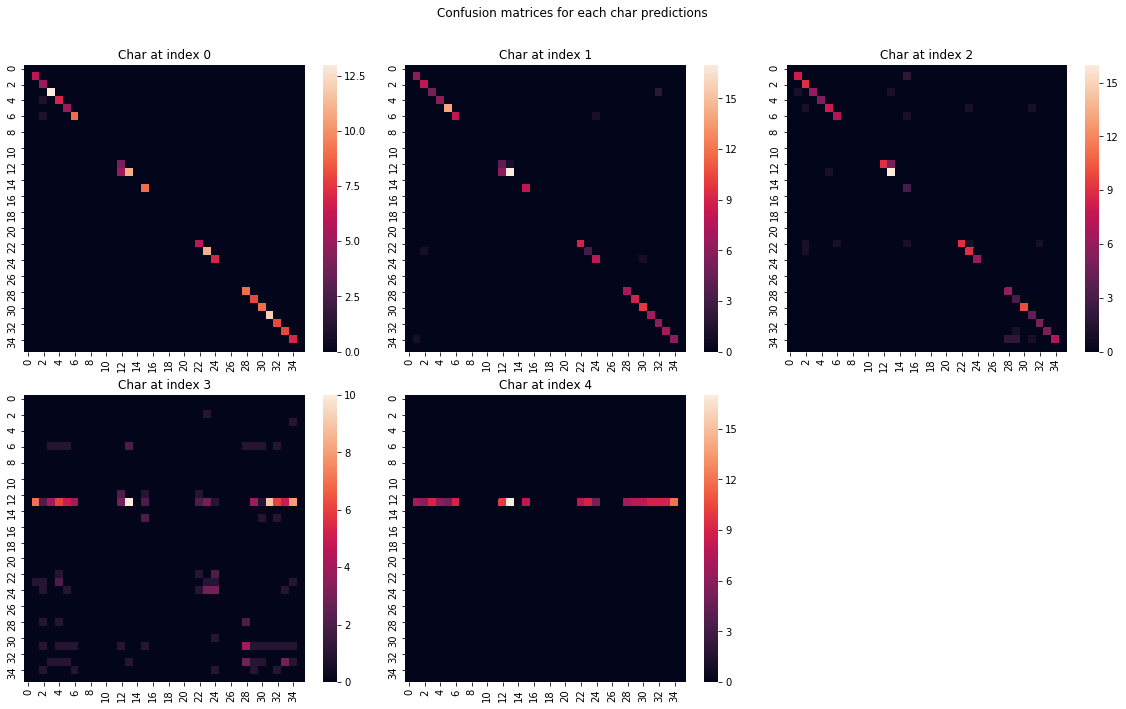

In [101]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

for k in range(0, 5):
    plt.sca(ax[k // 3, k % 3])
    plt.title('Char at index {}'.format(k))
    sns.heatmap(confusion_matrix(np.argmax(y_test_pred[k], axis=1), np.argmax(y_test[:, k, :], axis=1), labels=range(0, 36)))
ax[1, 2].set_visible(False)

plt.tight_layout()
plt.suptitle('Confusion matrices for each char predictions')

plt.subplots_adjust(top=0.9)